# Import Libraries

1. General libraries to work with data and visualize data:

In [1]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. sm and sklearn libraries to perform ols and linear regression:

In [2]:
# for standardizing the data.
from scipy.stats import zscore

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model & Stats Model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

3. To check model performance:

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1.1 Load dataset and explore

1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. (8 marks)

## 1.1.1 Data Exploration

In [4]:
df= pd.read_csv('Firm_level_data.csv')
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [6]:
df.shape

(759, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


All of the columns in the data are numeric in nature ('int64' or 'float64' type). Data is not scaled. Drop Unnamed:0 column

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


Fix which columns can be dropped
Fix which columns are corelated

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


## 1.1.2 Univariate Analysis

<Figure size 1000x600 with 0 Axes>

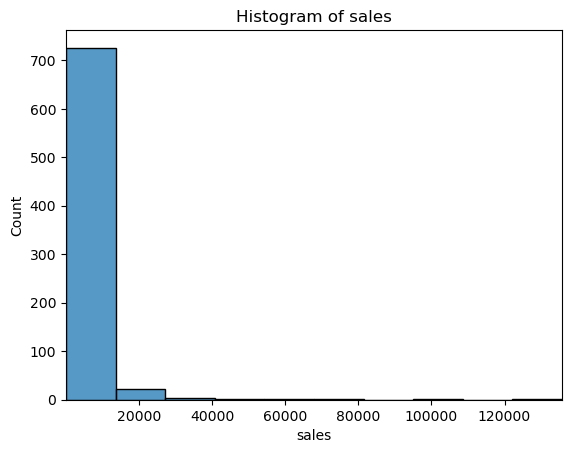

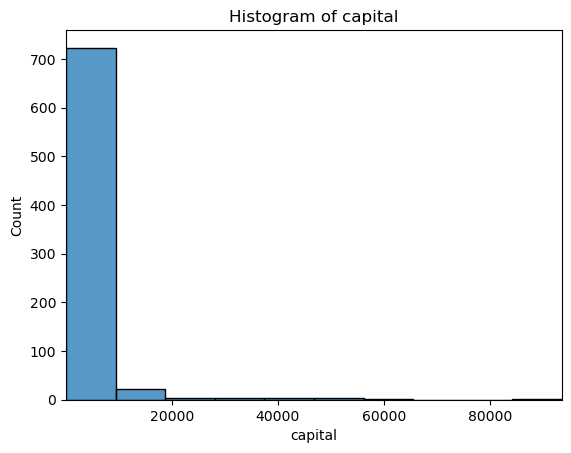

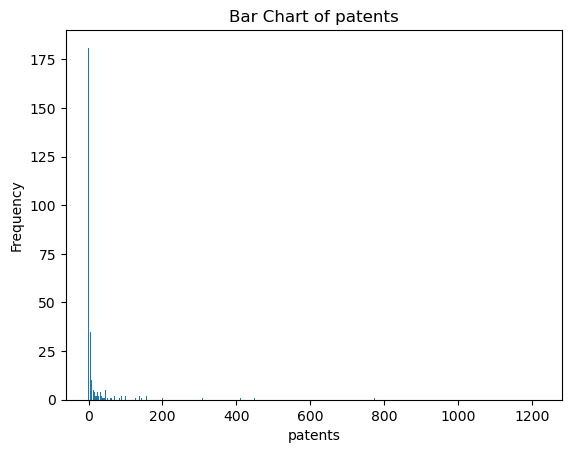

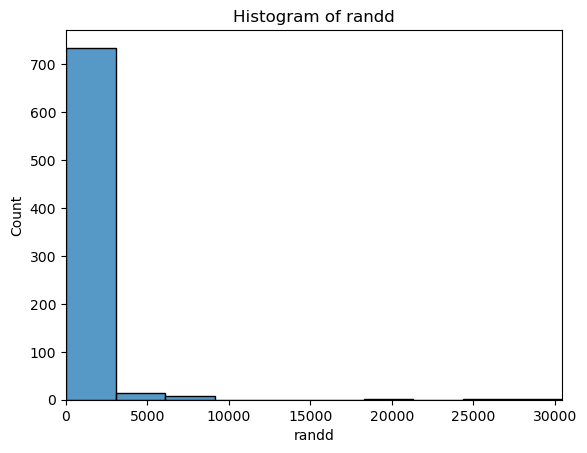

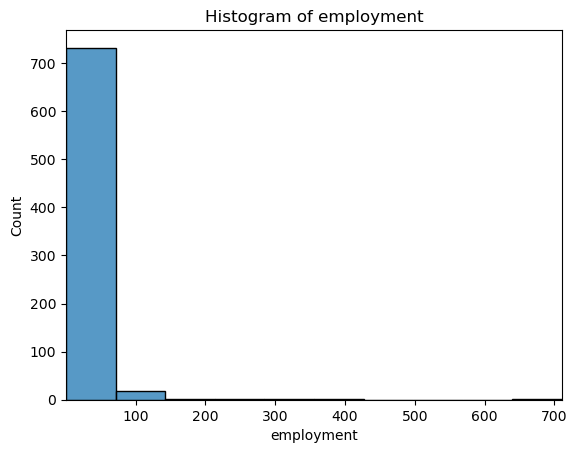

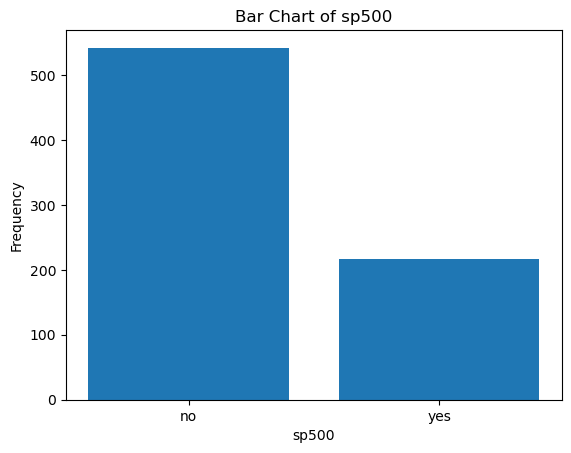

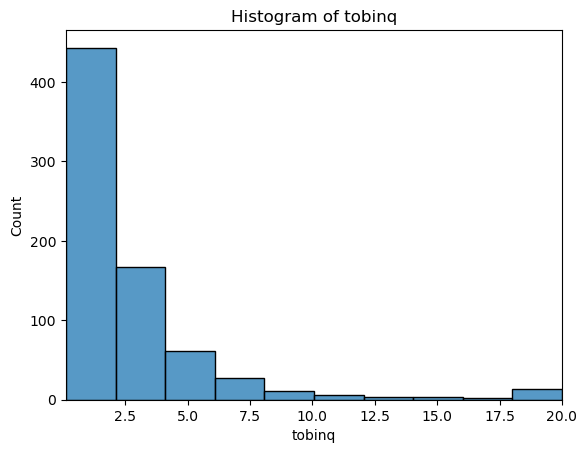

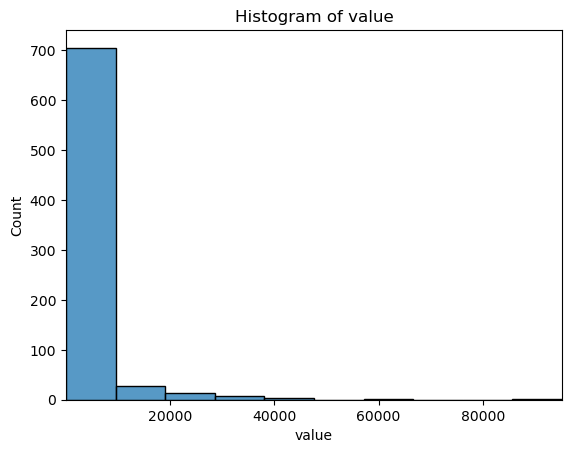

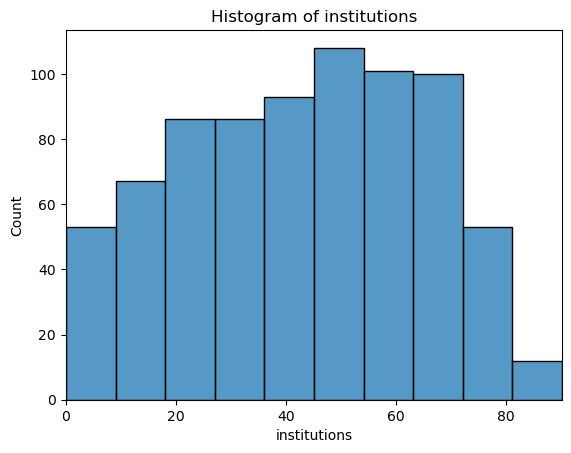

In [11]:
plt.figure(figsize=(10,6))
    # Loop through each column in the DataFrame
for column in df.columns:
    # Plot a histogram for numerical columns
    if df[column].dtype in [int, float]:
        plt.figure()
        sns.histplot(df[column], bins=10)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Histogram of {column}')
        # Set x-axis limits based on the data range
        plt.xlim(df[column].min(), df[column].max())

    # Plot a bar chart for categorical columns
    else:
        value_counts = df[column].value_counts()
        plt.figure()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Chart of {column}')

    # Show the plot
    plt.show()

## 1.1.3 Bivariate Analysis

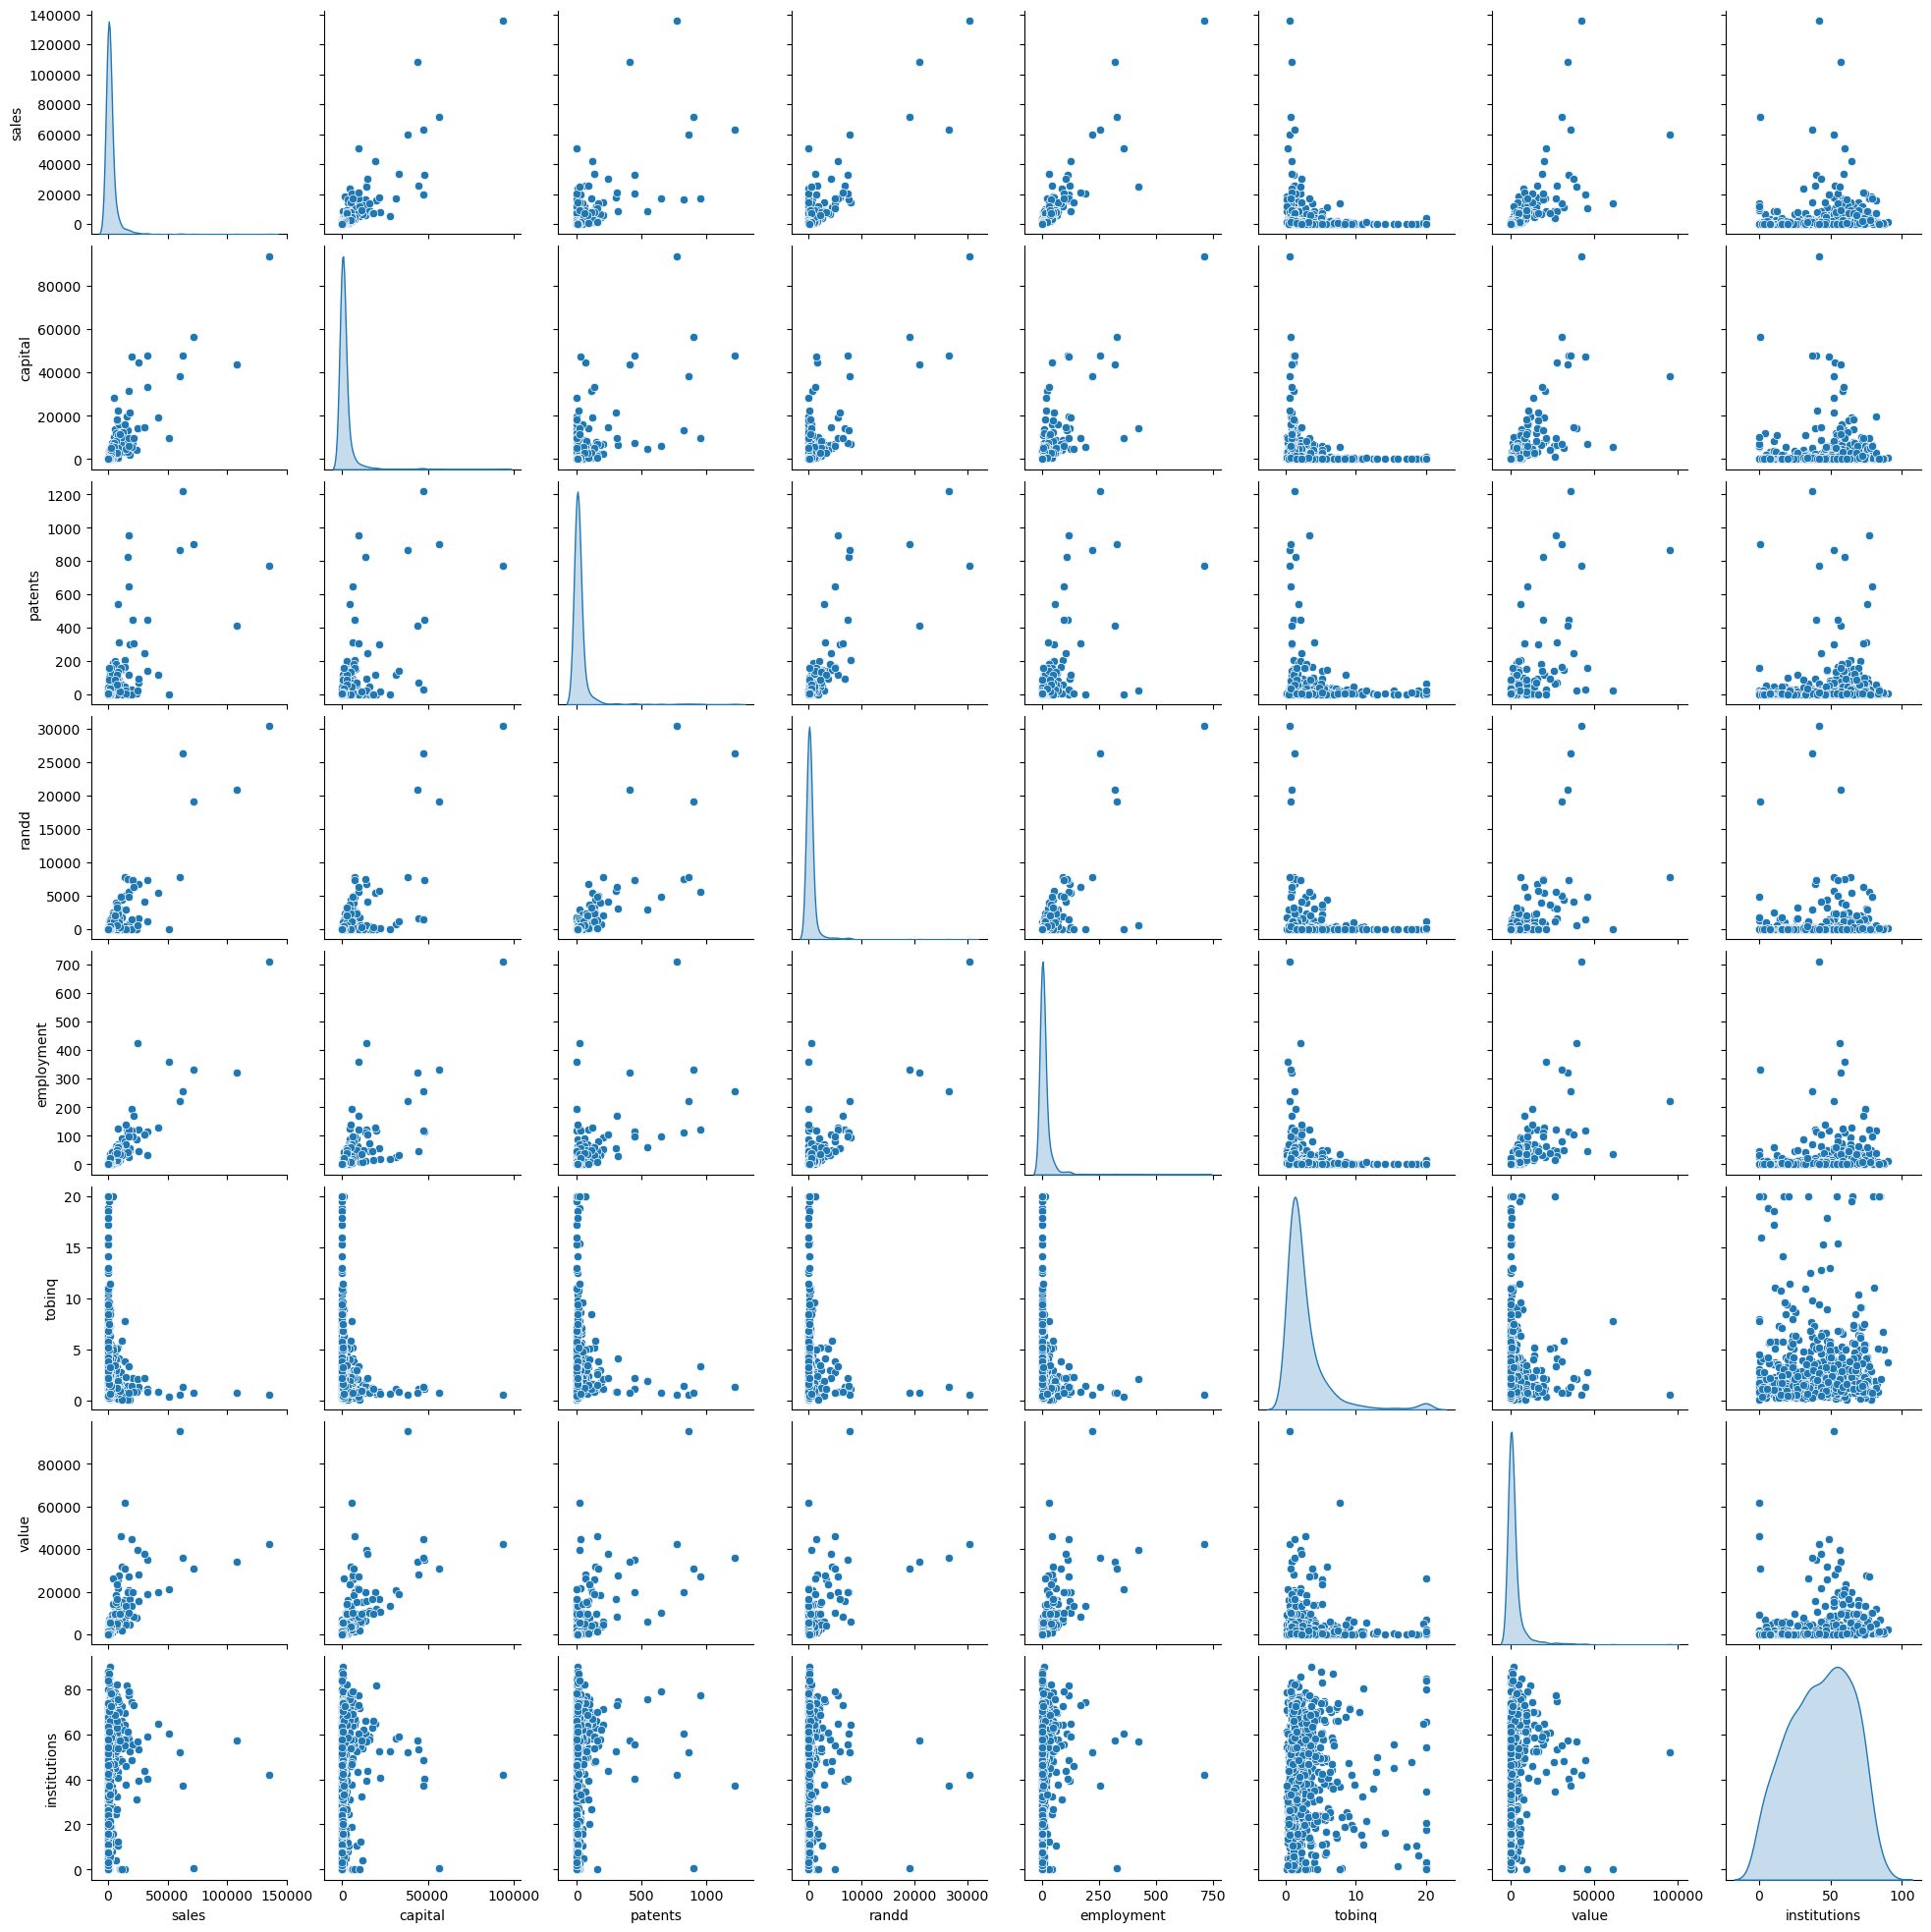

In [15]:
#Fix plot size

df = df.iloc[:, 0:23]
sns.pairplot(df, diag_kind='kde');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

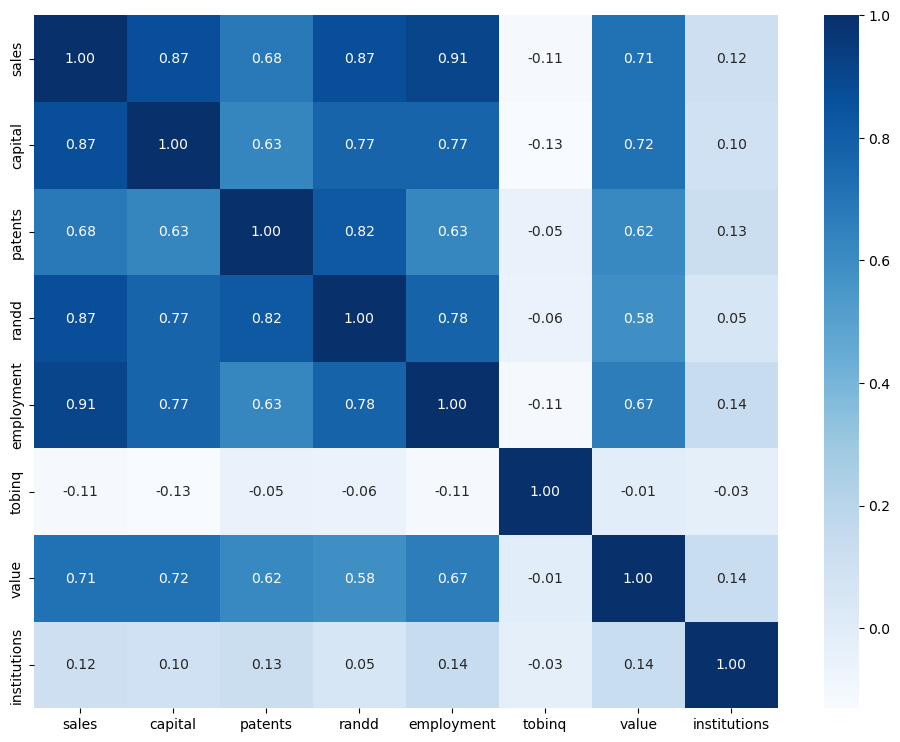

In [13]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

There is a strong positive co-relation between target variable 'sales' & 'capital', 'patents', 'randd', 'employment','value'

In [14]:
df.iloc[:, 1:].corr()

,capital,patents,randd,employment,tobinq,value,institutions
capital,1.000000,0.633339,0.770468,0.771263,-0.130567,0.715893,0.099160
patents,0.633339,1.000000,0.820497,0.626341,-0.049040,0.619547,0.127751
randd,0.770468,0.820497,1.000000,0.778005,-0.058420,0.584937,0.052570
employment,0.771263,0.626341,0.778005,1.000000,-0.113761,0.668336,0.144300
tobinq,-0.130567,-0.049040,-0.058420,-0.113761,1.000000,-0.006137,-0.025241
value,0.715893,0.619547,0.584937,0.668336,-0.006137,1.000000,0.138269
institutions,0.099160,0.127751,0.052570,0.144300,-0.025241,0.138269,1.000000


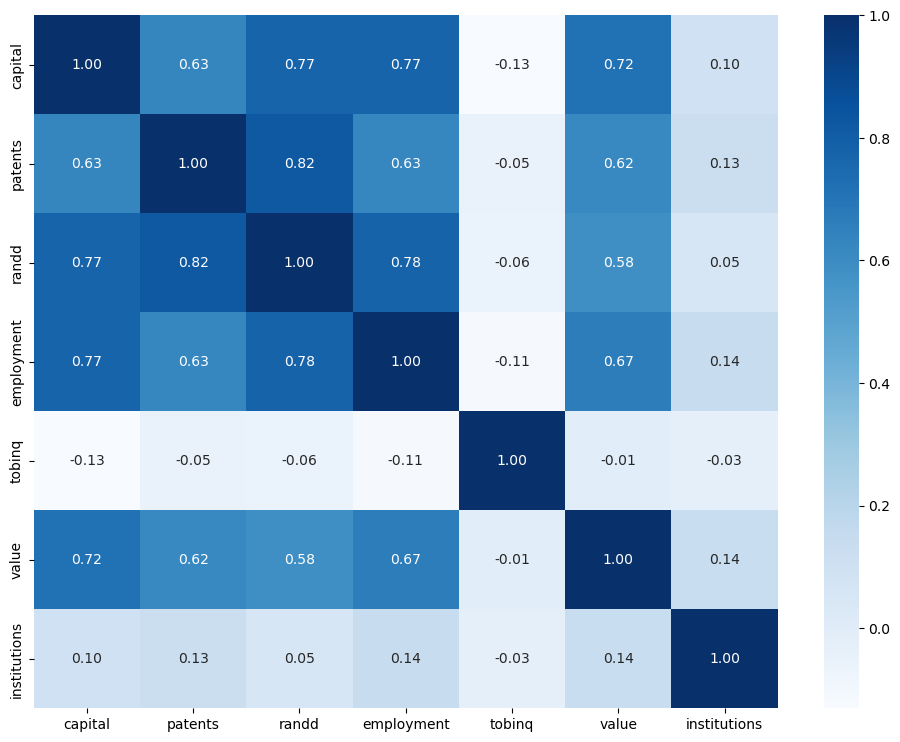

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Multi-collinearity refers to the presence of high correlations between independent variables (features) in a regression model. In this correlation matrix, we observe some instances of moderate to high correlations between features.

There might be multicollinearity among  the features indicating redundancy in the information they provide. High multicollinearity can affect the stability and interpretability of the regression model.

# 1.2 Data Preparation

1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

In [16]:
df.duplicated().sum()

0

There are no duplicates in the data

## 1.2.1 Null Values

In [17]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check for 0 or missing data
    num_zeros = (df[column] == 0).sum()
    num_missing = df[column].isnull().sum()
    num_question_marks = (df[column] == '?').sum()
    np_nan = (df[column] == np.NaN).sum()

    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"{column}: Numerical data")
    print(f"Feature: {column}")
    print(f"Number of zeros: {num_zeros}")
    print(f"Number of missing values: {num_missing}")
    print(f"Number of '?' values: {num_question_marks}")
    print('No of np.Nan', np_nan)
    print("-" * 20)

sales: Numerical data
Feature: sales
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
capital: Numerical data
Feature: capital
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
patents: Numerical data
Feature: patents
Number of zeros: 181
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
randd: Numerical data
Feature: randd
Number of zeros: 92
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
employment: Numerical data
Feature: employment
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
Feature: sp500
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
tobinq: Numerical data
Feature: tobinq
Number of zeros: 0
Number of missing values: 21
Number of '?' values: 0
No of np.Nan 0
-----------

There are no more missing values. However for '0' values.

In [18]:
df['randd'].describe()

count      759.000000
mean       439.938074
std       2007.397588
min          0.000000
25%          4.628262
50%         36.864136
75%        143.253403
max      30425.255860
Name: randd, dtype: float64

In [19]:
df['institutions'].describe()

count    759.000000
mean      43.020540
std       21.685586
min        0.000000
25%       25.395000
50%       44.110000
75%       60.510000
max       90.150000
Name: institutions, dtype: float64

In [20]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

There are 21 null/missing values in ‘tobinq’ column. Boxplots are generated to visualize the skewness in data.

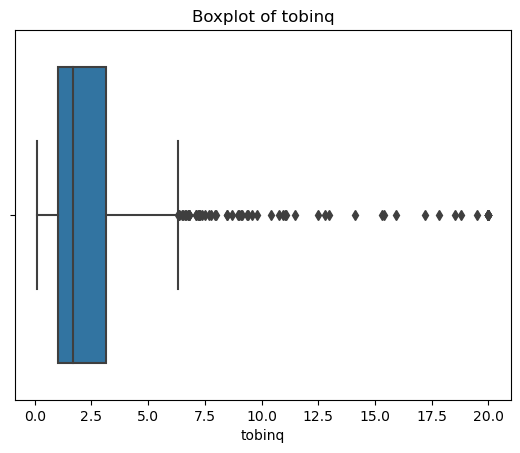

In [21]:
sns.boxplot(x= 'tobinq', data=df)
plt.title('Boxplot of tobinq')
plt.show()

In [22]:
df['tobinq'].describe()

count    738.000000
mean       2.794910
std        3.366591
min        0.119001
25%        1.018783
50%        1.680303
75%        3.139309
max       20.000000
Name: tobinq, dtype: float64

Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

In [23]:
medianfiller_tobinq=df['tobinq'].median()
medianfiller_tobinq

1.6803032755

In [24]:
df['tobinq']=df['tobinq'].fillna(medianfiller_tobinq)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


## 1.2.2 Encode Data

### Encode Data

Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (30:70). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE. (8 marks)

In [26]:
df['sp500'].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

In [27]:
## We are coding up the 'sp500' variable in #Fix Yes 1, No 0
df['sp500']=np.where(df['sp500'] =='yes', '1', df['sp500'])
df['sp500']=np.where(df['sp500'] =='no', '0', df['sp500'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [29]:
df['sp500'] = df['sp500'].astype('int64')

In [30]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0,1.063300,67.406408,49.46


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    int64  
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 53.5 KB


## 1.2.3 Outliers

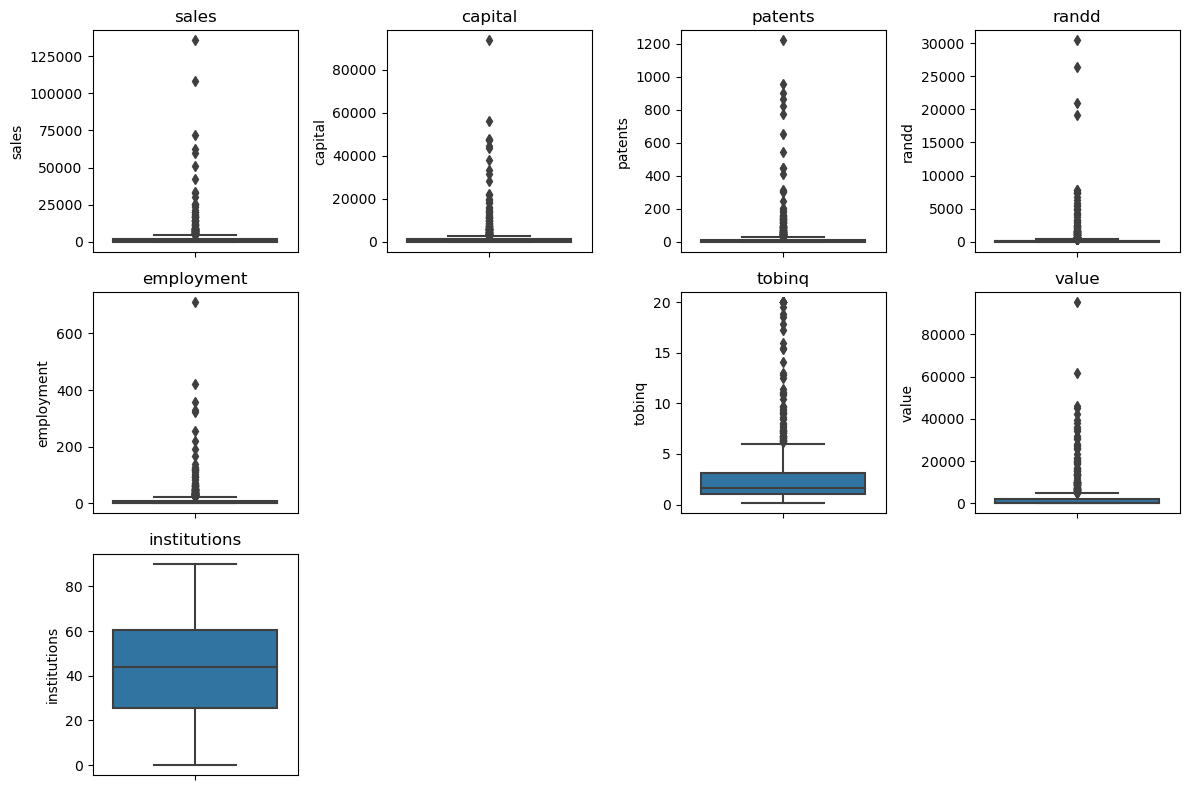

In [32]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
    if feature_list[i] != 'sp500':
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

The black dots in the boxplots show that there are multiple outliers in multiple columns specifically except 'institutions' remaining features have outliers.

Majority of the variables are highly skewed as well.

All the outliers are treated by adjusting them to the lower and upper bound values calculated by the IQR value

In [33]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [34]:
for i in df.columns:
    if i != 'sp500':
        LL,UL=remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

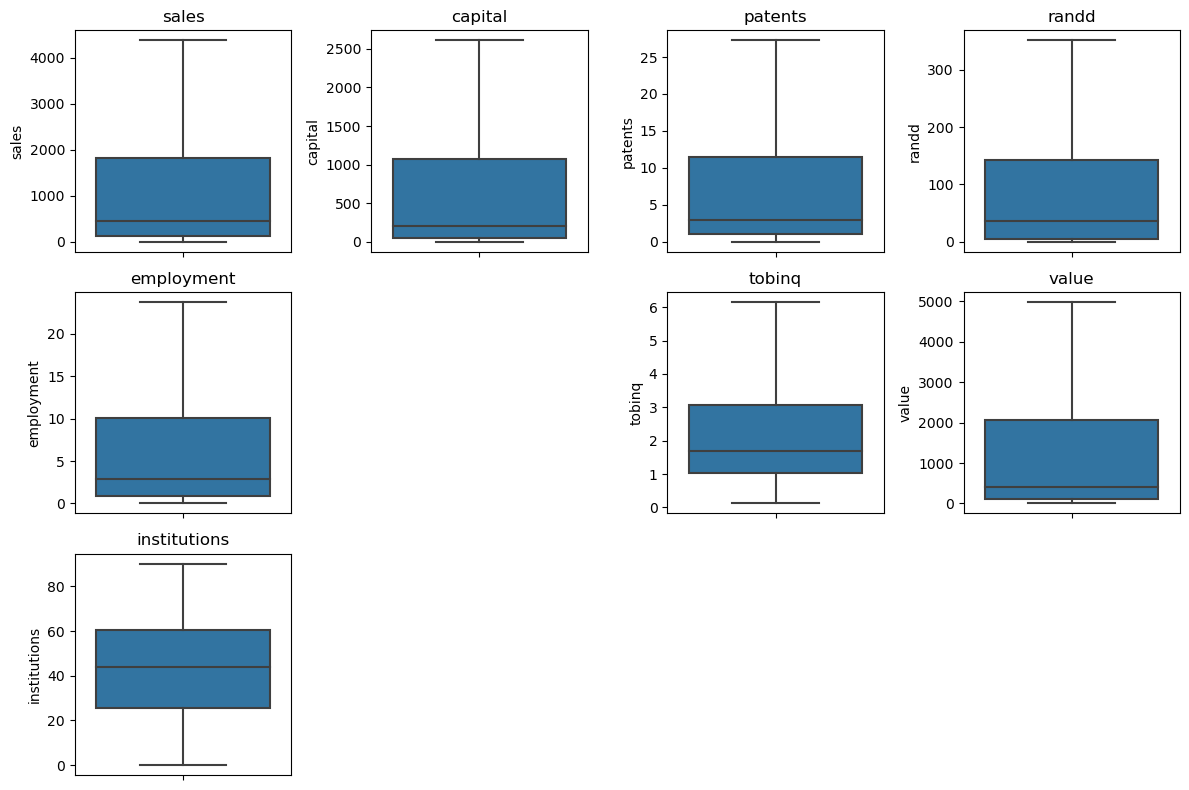

In [35]:
plt.figure(figsize = (12,8))
feature_list = df.columns

for i in range(len(feature_list)):
    if feature_list[i] != 'sp500':
        plt.subplot(3,4, i + 1)
        sns.boxplot(y = df[feature_list[i]], data = df)
        plt.title(feature_list[i])
        plt.tight_layout()

In [36]:
df.head(5)

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10.00,351.191114,2.306000,0,6.153448,1625.453755,80.27
1,407.753973,122.101012,2.00,0.000000,1.860000,0,0.844187,243.117082,59.02
2,4371.988416,2610.499299,27.25,351.191114,23.733752,1,5.205257,4980.010044,47.70
3,451.000010,266.899987,1.00,83.540161,3.071000,0,0.305221,63.024630,26.88
4,174.927981,140.124004,2.00,14.233637,1.947000,0,1.063300,67.406408,49.46


## 1.2.4 Corelation using corr matrix & heatmap

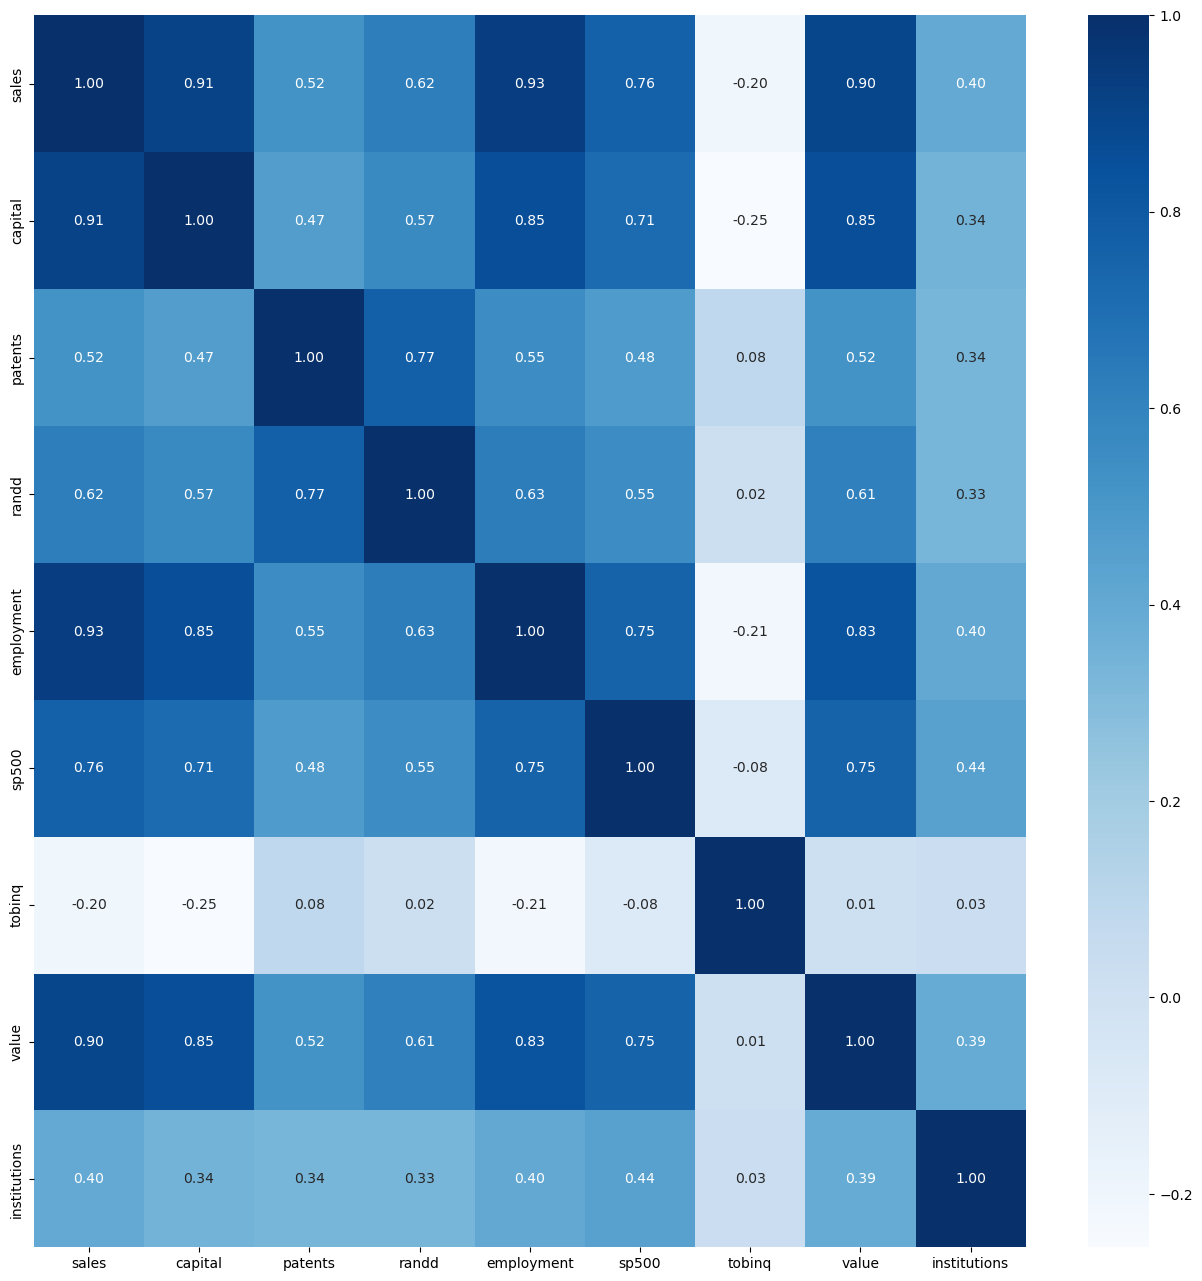

In [37]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [38]:
df.iloc[:, 1:].corr()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
capital,1.000000,0.466951,0.566615,0.854341,0.713219,-0.254308,0.854788,0.343700
patents,0.466951,1.000000,0.766115,0.549445,0.479642,0.084506,0.524527,0.337649
randd,0.566615,0.766115,1.000000,0.627847,0.549359,0.022451,0.613369,0.334401
employment,0.854341,0.549445,0.627847,1.000000,0.751064,-0.212293,0.830223,0.402510
sp500,0.713219,0.479642,0.549359,0.751064,1.000000,-0.082297,0.752080,0.442653
tobinq,-0.254308,0.084506,0.022451,-0.212293,-0.082297,1.000000,0.011250,0.027109
value,0.854788,0.524527,0.613369,0.830223,0.752080,0.011250,1.000000,0.392292
institutions,0.343700,0.337649,0.334401,0.402510,0.442653,0.027109,0.392292,1.000000


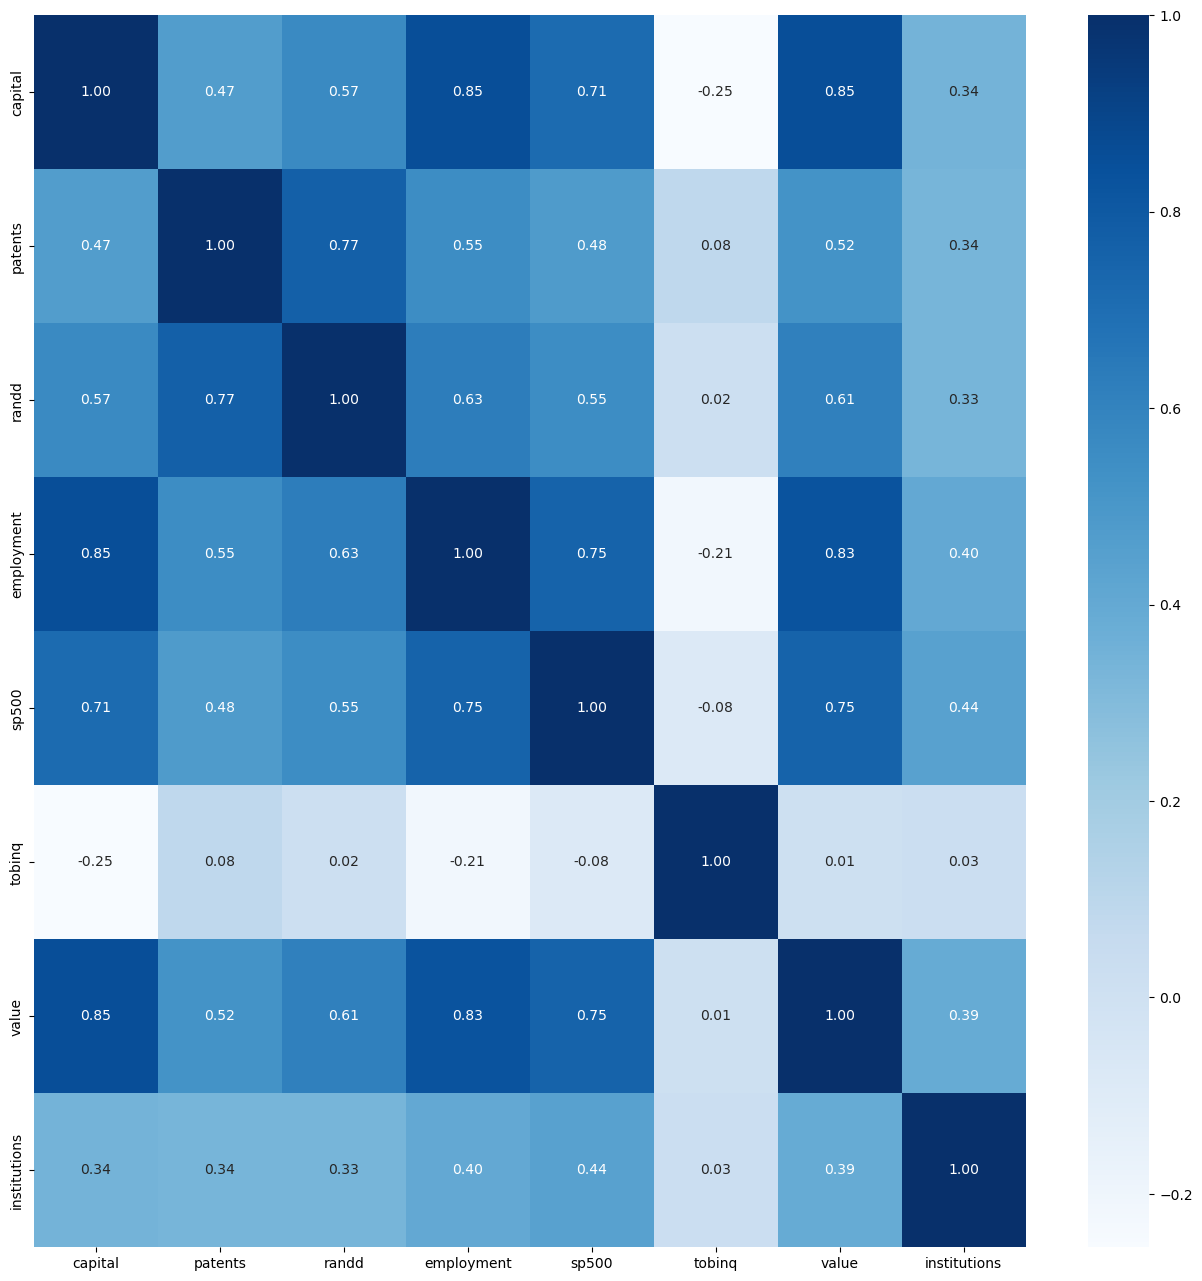

In [39]:
plt.figure(figsize=(16,16))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Based on the correlation matrix:

There are several strong and moderate positive correlations, indicating that certain variables tend to move together in a positive direction. For example, capital shows strong positive correlations with patents, randd, and employment.

'tobinq', 'institutions' are weakly co-related. 'patents', 'randd', 'sp500' are moderately co-realted with values around .6/.7. 'capital', 'employment', 'value' are highly co-related with correlation values over .8.

'value' shows moderate positive correlations with multiple variables, indicating potential associations with those variables.
The variable 'institutions' generally has weak positive correlations with other variables.

The variable 'tobinq' has weak negative correlations with several other variables, suggesting a weak inverse relationship.

There is high co-relation between the independent variables,  This needs to be addressed
It's important to note that correlation alone does not imply causation. Further analysis and domain knowledge are needed to determine the underlying relationships and causality between variables.

## 1.2.5 Scaling

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,1236.090089,1528.690552,0.138000,122.920000,448.577082,1822.547366,4371.988416
capital,759.0,728.715785,959.394531,0.057000,52.650501,202.179023,1075.790020,2610.499299
patents,759.0,7.800395,9.952684,0.000000,1.000000,3.000000,11.500000,27.250000
randd,759.0,99.512662,127.195056,0.000000,4.628262,36.864136,143.253403,351.191114
employment,759.0,6.925381,8.184188,0.006000,0.927500,2.924000,10.050001,23.733752
sp500,759.0,0.285903,0.452141,0.000000,0.000000,0.000000,1.000000,1.000000
tobinq,759.0,2.300408,1.723035,0.119001,1.036000,1.680303,3.082979,6.153448
value,759.0,1375.431494,1754.489690,1.971053,103.593946,410.793529,2054.160386,4980.010044
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


Scaling - Magnitude Differences:

The variables in the dataset have significantly different scales. For example, 'sales' and 'value', 'capital' have much larger magnitudes compared to 'patents', 'employment', and 'institutions'. Scaling can help to ensure that all features contribute equally to the model. That being said, it is not necessary to perform scaling on the data. In the later sections, ols reression model and linear regression model are fit on the original and scaled data. The models show no major difference in terms of performance metrics.

# 1.3 Create Models

In [41]:
# independent variables
X = df.drop(['sales'], axis=1)
# dependent variable
y = df[['sales']]

## 1.3.1 Split Data for Stats Model - Without Scaling

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1)

Although scaling did not affect the statistical significance or overall fit of the model in this case, it is generally a good practice to scale variables when they are measured on different scales or have different units. Scaling helps to avoid potential issues related to variable magnitudes and aids in the interpretation and stability of the coefficients.
Overall, scaling the variables can provide advantages in terms of interpretability, stability, and comparability of coefficients. However, in this specific analysis, scaling did not significantly alter the model's results or insights.

In [43]:
# Add constant to X_train and X_test
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)

In [44]:
X_trainc.head()

,const,capital,patents,randd,employment,sp500,tobinq,value,institutions
626,1.0,1315.696256,15.0,73.275818,16.472000,0,1.657513,2231.870118,31.47
333,1.0,15.258002,2.0,9.252643,0.566000,0,0.381755,9.877838,21.69
257,1.0,538.188036,20.0,87.388641,6.627000,0,2.126738,1019.443780,69.64
173,1.0,807.215091,0.0,68.900185,7.607001,1,3.151469,2221.768944,69.69
242,1.0,402.508010,2.0,0.000000,1.550000,0,2.154388,358.040202,85.42


In [45]:
X_testc.head()

,const,capital,patents,randd,employment,sp500,tobinq,value,institutions
480,1.0,50.688001,1.0,47.173386,1.147000,0,1.006168,34.516077,34.92
622,1.0,80.960002,3.0,50.251263,3.400000,0,1.259892,164.840772,18.88
638,1.0,1119.000008,19.0,78.623947,18.988003,1,1.900413,2114.826950,47.94
389,1.0,68.742010,3.0,44.827785,1.204000,0,2.262480,82.287341,24.65
748,1.0,308.770949,2.0,79.026939,3.264000,0,1.741800,533.056000,16.05


#### 1.3.1.1 Check Multi-collinearity using VIF:

VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

1 < VIF <5, moderate collinearity.

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [46]:
# Compute VIF for each predictor to detect multicollinearity
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF')

,feature,VIF
5,tobinq,2.656490
7,institutions,3.846556
4,sp500,4.193898
1,patents,4.285710
2,randd,4.690289
0,capital,8.251460
3,employment,8.859125
6,value,10.207006


‘employment’, ‘capital’, ‘value’ have high multicollinearity with VIF value > 5. However, dropping variables blindly based on VIF value may not always result in better models.

Using VIF, features with high co-linearity can be identified. For reference, the range of VIF:

VIF	Starts at 1
VIF = 1	no correlation between this independent variable and the other variables
1 < VIF < 5	Indicates moderate collinearity
VIF > 5	exceeding 5 or 10 indicates high multicollinearity between this independent variable and the other.


### 1.3.2 Model 1 - Initial Model

In [47]:
# Fit the initial model
initial_model = sm.OLS(y_train, X_trainc).fit()

# Print the summary of the initial model
print(initial_model.summary())

# Predict on training and test sets
y_pred_train = initial_model.predict(X_trainc)
y_pred_test  = initial_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("\nInitial OLS Model Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nInitial OLS Model Test Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)

# Drop the least significant feature and refit the model
p_values = initial_model.pvalues.drop('const')
while p_values.max() > 0.05:
    X_trainc = X_trainc.drop(columns=p_values.idxmax())
    X_testc = X_testc.drop(columns=p_values.idxmax())
    improved_model = sm.OLS(y_train, X_trainc).fit()
    p_values = improved_model.pvalues.drop('const')

# Print the summary of the final model
print(improved_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     953.8
Date:                Sun, 14 May 2023   Prob (F-statistic):          7.27e-306
Time:                        16:56:18   Log-Likelihood:                -3927.4
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     522   BIC:                             7911.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.7353     48.629      1.516   

In [48]:
# Predict on training and test sets
y_pred_train = improved_model.predict(X_trainc)
y_pred_test  = improved_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nTest Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)

Training Set Metrics:
RMSE: 395.3975671797366
R-squared: 0.9356254296687838

Test Set Metrics:
RMSE: 398.4877494359508
R-squared: 0.9246052606459508


### 1.3.3 Model -2 OLS Stats Model by dropping variables

In [49]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('sales', axis=1),
                                                    df['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 420.0331804579679
R-squared: 0.9162319718441655
F-statistic: 915.5179703660357
Coefficients:
const           208.051387
patents          -6.315886
randd             0.783458
employment       91.018639
sp500           178.453064
tobinq          -85.609714
value             0.389995
institutions     -0.295563
dtype: float64
--------------------------------------------------
Results for dropping variable: patents

New Model Test Metrics:
RMSE: 398.3228652648048
R-squared: 0.9246676406173562
F-statistic: 1085.925527728498
Coefficients:
const            77.112132
capital           0.409386
randd             0.398901
employment       77.753583
sp500           159.833953
tobinq          -43.427655
value             0.244853
institutions      0.089206
dtype: float64
--------------------------------------------------
Results for dropping variable: randd

New Model Test Metrics:
RMSE: 394.01320537921606
R-squared: 0.9262889411

Dropping 'patents'. and running ols model again.

In [50]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales','patents'], axis=1),
                                                    df['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 416.36208576143645
R-squared: 0.9176898399957122
F-statistic: 1060.5164250638816
Coefficients:
const           214.592506
randd             0.459688
employment       90.095990
sp500           167.675077
tobinq          -89.581313
value             0.391157
institutions     -0.471116
dtype: float64
--------------------------------------------------
Results for dropping variable: randd

New Model Test Metrics:
RMSE: 394.0029711233128
R-squared: 0.9262927702801197
F-statistic: 1257.143205639893
Coefficients:
const            73.834552
capital           0.412496
employment       80.544469
sp500           173.203354
tobinq          -39.812208
value             0.246425
institutions      0.227225
dtype: float64
--------------------------------------------------
Results for dropping variable: employment

New Model Test Metrics:
RMSE: 511.13780107795196
R-squared: 0.8759527629317578
F-statistic: 808.408551811965
Coefficients

'randd' shall be dropped next

In [51]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales','patents', 'randd'], axis=1),
                                                    df['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 410.47360098078923
R-squared: 0.9200015527264398
F-statistic: 1261.1126509295632
Coefficients:
const           212.015946
employment       93.424063
sp500           183.168364
tobinq          -85.814577
value             0.394252
institutions     -0.316790
dtype: float64
--------------------------------------------------
Results for dropping variable: employment

New Model Test Metrics:
RMSE: 503.14097727793893
R-squared: 0.8798038732619103
F-statistic: 911.3944827833301
Coefficients:
const           203.687233
capital           0.625003
sp500           494.730880
tobinq          -82.164478
value             0.391301
institutions      2.149050
dtype: float64
--------------------------------------------------
Results for dropping variable: sp500

New Model Test Metrics:
RMSE: 384.3506863601923
R-squared: 0.9298598941572874
F-statistic: 1490.6905926525467
Coefficients:
const           53.066763
capital          0.41418

drop 'sp500'

In [52]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales','patents', 'randd','sp500'], axis=1),
                                                    df['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 403.4842744669263
R-squared: 0.9227027005617567
F-statistic: 1558.6055314909986
Coefficients:
const           190.645198
employment       96.965068
tobinq          -85.925996
value             0.414774
institutions      0.166010
dtype: float64
--------------------------------------------------
Results for dropping variable: employment

New Model Test Metrics:
RMSE: 485.8242874602678
R-squared: 0.8879351175906226
F-statistic: 1055.6658742457844
Coefficients:
const           155.912145
capital           0.657084
tobinq          -87.264794
value             0.467723
institutions      3.809799
dtype: float64
--------------------------------------------------
Results for dropping variable: tobinq

New Model Test Metrics:
RMSE: 390.3787615852017
R-squared: 0.9276425157076919
F-statistic: 1825.9201080875725
Coefficients:
const          -40.350260
capital          0.469469
employment      86.913595
value            0.226824


drop 'institutions'

In [98]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales','patents','institutions','randd'], axis=1),
                                                    df['sales'],
                                                    test_size=0.3,
                                                    random_state=1)
# Predict on training and test sets
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)
improved_model = sm.OLS(y_train, X_trainc).fit()
y_pred_train = improved_model.predict(X_trainc)
y_pred_test  = improved_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nTest Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)
print(improved_model.summary())

Training Set Metrics:
RMSE: 397.20671726067104
R-squared: 0.935034987496708

Test Set Metrics:
RMSE: 394.38620894692014
R-squared: 0.9261493138182268
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1511.
Date:                Sun, 14 May 2023   Prob (F-statistic):          6.21e-309
Time:                        17:25:14   Log-Likelihood:                -3931.2
No. Observations:                 531   AIC:                             7874.
Df Residuals:                     525   BIC:                             7900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

'patents','institutions','randd', followed by 'sp500' can be dropped

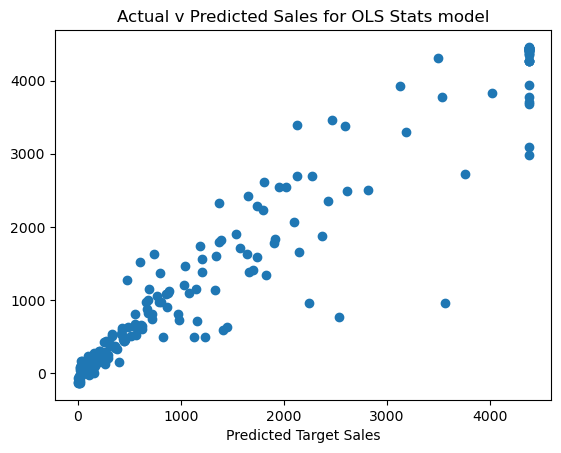

In [100]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Target Sales')
plt.xlabel('Predicted Target Sales')
plt.title('Actual v Predicted Sales for OLS Stats model')
plt.show()

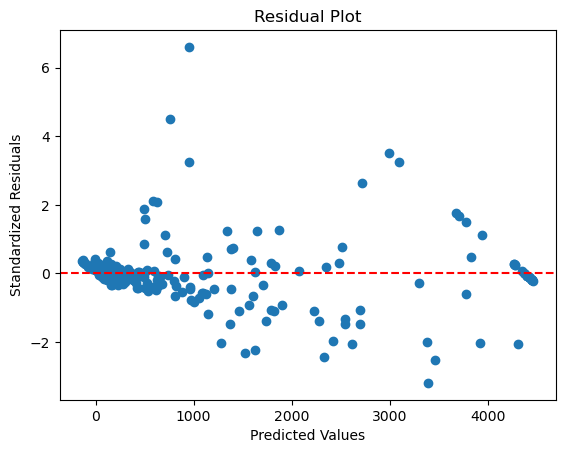

In [90]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Calculate the standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Create the residual plot
plt.scatter(y_pred_test, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

In [55]:
# Create the regression equation
equation = "y = "
for i, (var, coef) in enumerate(improved_model.params.items()):
    equation += f" + {coef:.4f} * {var}"

# Print the regression equation
print(equation)

y =  + 81.7013 * const + 0.4118 * capital + 80.6845 * employment + 176.4655 * sp500 + -39.6549 * tobinq + 0.2466 * value


OLS Stats improved regression model equation can be given as below:
    
y =  (81.7013 * const) + (0.4118 * capital) + (80.6845 * employment) + (176.4655 * sp500) - (39.6549 * tobinq) + (0.2466 * value)

### Stats Models - on Scaled data

In [56]:
X.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,161.603986,10.00,351.191114,2.306000,0,6.153448,1625.453755,80.27
1,122.101012,2.00,0.000000,1.860000,0,0.844187,243.117082,59.02
2,2610.499299,27.25,351.191114,23.733752,1,5.205257,4980.010044,47.70
3,266.899987,1.00,83.540161,3.071000,0,0.305221,63.024630,26.88
4,140.124004,2.00,14.233637,1.947000,0,1.063300,67.406408,49.46


In [57]:
# Separate binary and non-binary variables
binary_vars = ['sp500']  # List of binary variables
non_binary_vars = [col for col in X.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = X.copy()
X_scaled[non_binary_vars] = X_scaled[non_binary_vars].apply(zscore)

In [58]:
X_scaled.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.591504,0.221152,1.979986,-0.564800,0,2.237668,0.142598,1.718839
1,-0.632706,-0.583181,-0.782879,-0.619331,0,-0.845706,-0.645807,0.738279
2,1.962722,1.955496,1.979986,2.055116,1,1.687002,2.055843,0.215929
3,-0.481679,-0.683723,-0.125658,-0.471265,0,-1.158713,-0.748521,-0.744789
4,-0.613908,-0.583181,-0.670901,-0.608694,0,-0.718456,-0.746022,0.297142


In [59]:
# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1)

In [60]:
# Add constant to X_train and X_test
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)

In [61]:
X_trainc.head()

,const,capital,patents,randd,employment,sp500,tobinq,value,institutions
626,1.0,0.612227,0.723860,-0.206409,1.167240,0,-0.373364,0.488463,-0.532988
333,1.0,-0.744145,-0.583181,-0.710087,-0.777545,0,-1.114266,-0.778833,-0.984276
257,1.0,-0.198723,1.226569,-0.095381,-0.036482,0,-0.100860,-0.203035,1.228328
173,1.0,0.081876,-0.784265,-0.240832,0.083340,1,0.494257,0.482702,1.230635
242,1.0,-0.340238,-0.583181,-0.782879,-0.657234,0,-0.084802,-0.580261,1.956480


In [62]:
X_testc.head()

,const,capital,patents,randd,employment,sp500,tobinq,value,institutions
480,1.0,-0.707191,-0.683723,-0.411760,-0.706508,0,-0.751635,-0.764781,-0.373791
622,1.0,-0.675617,-0.482640,-0.387546,-0.431039,0,-0.604284,-0.690451,-1.113941
638,1.0,0.407071,1.126027,-0.164334,1.474865,1,-0.232299,0.421708,0.227003
389,1.0,-0.688360,-0.482640,-0.430213,-0.699538,0,-0.022027,-0.737535,-0.847690
748,1.0,-0.438007,-0.583181,-0.161164,-0.447668,0,-0.324414,-0.480442,-1.244528


In [63]:
# Compute VIF for each predictor to detect multicollinearity
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF')

,feature,VIF
7,institutions,1.272333
5,tobinq,1.426445
4,sp500,1.965792
1,patents,2.654913
2,randd,2.937165
3,employment,5.130612
0,capital,5.667341
6,value,6.382272


### 1.3.4 Model 3 - OLS Stats Inintial Model on scaled data

In [91]:
# Fit the initial model
scaled_model = sm.OLS(y_train, X_trainc).fit()

# Print the summary of the initial model
print(scaled_model.summary())

# Predict on training and test sets
y_pred_train = scaled_model.predict(X_trainc)
y_pred_test  = scaled_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("\nScaled Model Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nScaled Model Test Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)

# Drop the least significant feature and refit the model
p_values = scaled_model.pvalues.drop('const')
while p_values.max() > 0.05:
    X_trainc = X_trainc.drop(columns=p_values.idxmax())
    X_testc = X_testc.drop(columns=p_values.idxmax())
    improved_scaled_model = sm.OLS(y_train, X_trainc).fit()
    p_values = improved_scaled_model.pvalues.drop('const')

# Print the summary of the final model
print(improved_scaled_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1511.
Date:                Sun, 14 May 2023   Prob (F-statistic):          6.21e-309
Time:                        17:22:15   Log-Likelihood:                -3931.2
No. Observations:                 531   AIC:                             7874.
Df Residuals:                     525   BIC:                             7900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7013     37.525      2.177      0.0

### 1.3.5 Model 4 - OLS Stats Model by dropping variables on scaled data

In [65]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Separate binary and non-binary variables
skip_vars = ['sp500','sales']  # List of binary variables
scale_vars = [col for col in df.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = df.copy()
X_scaled[scale_vars] = X_scaled[scale_vars].apply(zscore)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop('sales', axis=1),
                                                    X_scaled['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 0.2749478338022544
R-squared: 0.9162319718441652
F-statistic: 915.5179703660357
Coefficients:
const          -0.027652
patents        -0.041120
randd           0.065188
employment      0.487289
sp500           0.116813
tobinq         -0.096493
value           0.447600
institutions   -0.004193
dtype: float64
--------------------------------------------------
Results for dropping variable: patents

New Model Test Metrics:
RMSE: 0.260736565713822
R-squared: 0.9246676406173568
F-statistic: 1085.925527728498
Coefficients:
const          -0.027341
capital         0.256927
randd           0.033191
employment      0.416271
sp500           0.104625
tobinq         -0.048949
value           0.281020
institutions    0.001265
dtype: float64
--------------------------------------------------
Results for dropping variable: randd

New Model Test Metrics:
RMSE: 0.25791552274603863
R-squared: 0.9262889411290566
F-statistic: 1075.49652

Dropping 'randd'. and running ols model again.

In [66]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Separate binary and non-binary variables
skip_vars = ['sp500','sales']  # List of binary variables
scale_vars = [col for col in df.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = df.copy()
X_scaled[scale_vars] = X_scaled[scale_vars].apply(zscore)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop(['sales','randd'], axis=1),
                                                    X_scaled['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients:")
    print(results[i].params)
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 0.26867834736143054
R-squared: 0.9200086503752885
F-statistic: 1049.033762896872
Coefficients:
const          -0.030351
patents        -0.003488
employment      0.501650
sp500           0.121104
tobinq         -0.096091
value           0.452585
institutions   -0.004152
dtype: float64
--------------------------------------------------
Results for dropping variable: patents

New Model Test Metrics:
RMSE: 0.2579088235455427
R-squared: 0.9262927702801192
F-statistic: 1257.1432056398933
Coefficients:
const          -0.030589
capital         0.258879
employment      0.431213
sp500           0.113376
tobinq         -0.044874
value           0.282824
institutions    0.003223
dtype: float64
--------------------------------------------------
Results for dropping variable: employment

New Model Test Metrics:
RMSE: 0.3261498154420266
R-squared: 0.8821276446043794
F-statistic: 778.1841980686867
Coefficients:
const          -0.078

'sp500' shall be dropped next

In [67]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Separate binary and non-binary variables
skip_vars = ['sp500','sales']  # List of binary variables
scale_vars = [col for col in df.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = df.copy()
X_scaled[scale_vars] = X_scaled[scale_vars].apply(zscore)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop(['sales','randd','sp500'], axis=1),
                                                    X_scaled['sales'],
                                                    test_size=0.3,
                                                    random_state=1)

# Store the names of all variables in a list
variables = list(X_train.columns)

# Create an empty list to store the results
results = []

# Loop through each variable and perform OLS regression
for variable in variables:
    # Create the feature matrix X and target variable y for training set
    X_train_temp = X_train.drop(variable, axis=1)
    X_train_temp = sm.add_constant(X_train_temp)
    
    # Fit the OLS regression model for training set
    model = sm.OLS(y_train, X_train_temp)
    results.append(model.fit())

# Loop through the results and print the regression summary, coefficients, and F-statistic
for i, variable in enumerate(variables):
    print(f"Results for dropping variable: {variable}")
    
    # Create the feature matrix X and target variable y for testing set
    X_test_temp = X_test.drop(variable, axis=1)
    X_test_temp = sm.add_constant(X_test_temp)
    
    
    # Predict the target variable for testing set

    y_pred_test = results[i].predict(X_test_temp)

    # Compute RMSE for test sets
    stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    # Compute R-squared for test sets
    stats_r2_test = r2_score(y_test, y_pred_test)
    
    # Print the performance metrics
    
    print("\nNew Model Test Metrics:")
    print("RMSE:", stats_rmse_test)
    print("R-squared:", stats_r2_test)
    print("F-statistic:", results[i].fvalue)
    print("Coefficients :" , results[i].params)
    print('pvalues', results[i].pvalues)
   # print(results[i].params)
    #print('pvalue', results[i].pvalues[1])
    print("-" * 50)


Results for dropping variable: capital

New Model Test Metrics:
RMSE: 0.2641525105278127
R-squared: 0.9226808318484061
F-statistic: 1244.524931495288
Coefficients : const           0.003957
patents         0.001020
employment      0.518635
tobinq         -0.097035
value           0.475941
institutions    0.002235
dtype: float64
pvalues const           7.503566e-01
patents         9.478460e-01
employment      1.406674e-67
tobinq          6.181758e-12
value           7.071230e-65
institutions    8.714486e-01
dtype: float64
--------------------------------------------------
Results for dropping variable: patents

New Model Test Metrics:
RMSE: 0.25159057320167905
R-squared: 0.9298598941572873
F-statistic: 1490.6905926525467
Coefficients : const           0.001521
capital         0.259937
employment      0.448853
tobinq         -0.044781
value           0.304397
institutions    0.009730
dtype: float64
pvalues const           8.942452e-01
capital         6.928322e-21
employment      2.320688

drop 'patents'

'patents', 'randd','sp500' appear to be the variables that can be explained by other variables when data is scaled.

In [92]:


import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Separate binary and non-binary variables
skip_vars = ['sp500','sales']  # List of binary variables
scale_vars = [col for col in df.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = df.copy()
X_scaled[scale_vars] = X_scaled[scale_vars].apply(zscore)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop(['sales', 'patents','randd','sp500'], axis=1),
                                                    X_scaled['sales'],
                                                    test_size=0.3,
                                                    random_state=1)
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)
improved_scaled_model = sm.OLS(y_train, X_trainc).fit()
y_pred_train = improved_scaled_model.predict(X_trainc)
y_pred_test  = improved_scaled_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nTest Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)
print(improved_scaled_model.summary())

Training Set Metrics:
RMSE: 0.26167596353354977
R-squared: 0.9341977696155641

Test Set Metrics:
RMSE: 0.25159057320167905
R-squared: 0.9298598941572873
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1491.
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.79e-307
Time:                        17:22:26   Log-Likelihood:                -41.572
No. Observations:                 531   AIC:                             95.14
Df Residuals:                     525   BIC:                             120.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t| 

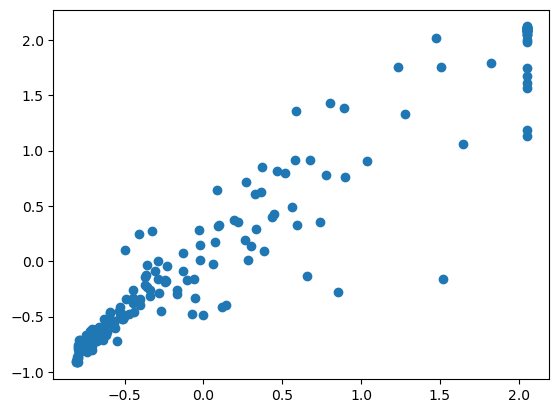

In [82]:
plt.scatter(y_test, y_pred_test)
plt.show()

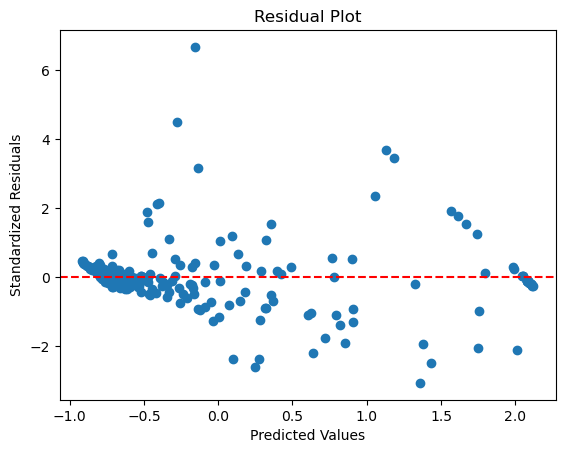

In [93]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Calculate the standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Create the residual plot
plt.scatter(y_pred_test, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

In [83]:
# Create the regression equation
equation = "y = "
for i, (var, coef) in enumerate(improved_scaled_model.params.items()):
    equation += f" + {coef:.4f} * {var}"

# Print the regression equation
print(equation)

y =  + 0.0015 * const + 0.2599 * capital + 0.4489 * employment + -0.0448 * tobinq + 0.3044 * value + 0.0097 * institutions


In [70]:
# Predict on training and test sets
y_pred_train = improved_scaled_model.predict(X_trainc)
y_pred_test  = improved_scaled_model.predict(X_testc)

# Compute RMSE for training and test sets
stats_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
stats_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Compute R-squared for training and test sets
stats_r2_train = r2_score(y_train, y_pred_train)
stats_r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print("Scaled Improved Model Training Set Metrics:")
print("RMSE:", stats_rmse_train)
print("R-squared:", stats_r2_train)

print("\nScaled Improved Model Test Set Metrics:")
print("RMSE:", stats_rmse_test)
print("R-squared:", stats_r2_test)

Scaled Improved Model Training Set Metrics:
RMSE: 0.26167596353354977
R-squared: 0.9341977696155641

Scaled Improved Model Test Set Metrics:
RMSE: 0.25159057320167905
R-squared: 0.9298598941572873


### 1.3.6 Model 7 - Linear regression model without scaling

In [71]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1)

In [72]:
X_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
626,1315.696256,15.0,73.275818,16.472000,0,1.657513,2231.870118,31.47
333,15.258002,2.0,9.252643,0.566000,0,0.381755,9.877838,21.69
257,538.188036,20.0,87.388641,6.627000,0,2.126738,1019.443780,69.64
173,807.215091,0.0,68.900185,7.607001,1,3.151469,2221.768944,69.69
242,402.508010,2.0,0.000000,1.550000,0,2.154388,358.040202,85.42


In [73]:
X_test.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
480,50.688001,1.0,47.173386,1.147000,0,1.006168,34.516077,34.92
622,80.960002,3.0,50.251263,3.400000,0,1.259892,164.840772,18.88
638,1119.000008,19.0,78.623947,18.988003,1,1.900413,2114.826950,47.94
389,68.742010,3.0,44.827785,1.204000,0,2.262480,82.287341,24.65
748,308.770949,2.0,79.026939,3.264000,0,1.741800,533.056000,16.05


#### Linear Regression before Scaling:

In [94]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both the training set and the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute the RMSE and R-squared for both the training set and the test set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the model coefficients, model_intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('----\n')
# Print the performance metrics for both the training set and the test set
print("Training set performance:")
print(f"RMSE: {rmse_train:.3f}")
print(f"R-squared: {r2_train:.3f}")
print('MSE', mse_train)

print("\nTest set performance:")
print(f"RMSE: {rmse_test:.3f}")
print(f"R-squared: {r2_test:.3f}")
print('MSE', mse_test)


Coefficients: [[  0.40506319  -4.66215536   0.63853807  78.56497068 167.87266108
  -40.98329451   0.24554026   0.21287606]]
Intercept: [73.73534908]
----

Training set performance:
RMSE: 394.337
R-squared: 0.936
MSE 155501.80063898838

Test set performance:
RMSE: 400.002
R-squared: 0.924
MSE 160001.69195429183


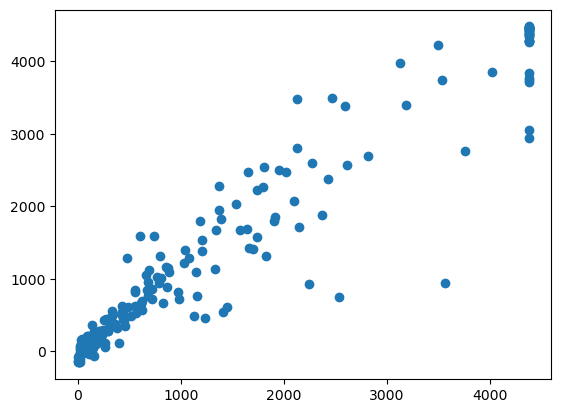

In [85]:
plt.scatter(y_test, y_pred_test)
plt.show()

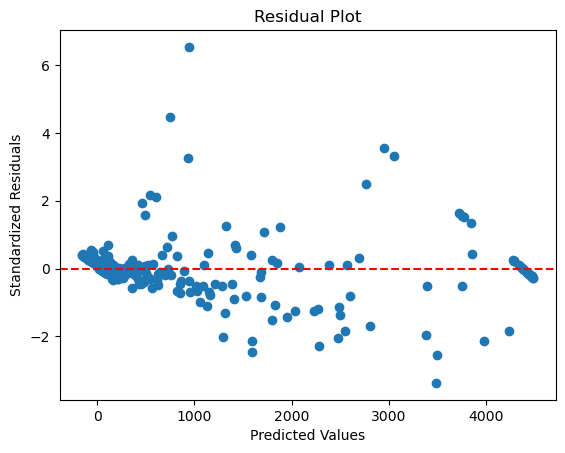

In [95]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Calculate the standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Create the residual plot
plt.scatter(y_pred_test, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

In [75]:
# Column names
columns = ['capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'value', 'institutions']

# Coefficients
coefficients = [  0.40506319  ,-4.66215536  , 0.63853807,  78.56497068 ,167.87266108,  -40.98329451,   0.24554026 ,  0.21287606]

# Construct the linear regression equation
equation = 'y = '
for i, col in enumerate(columns):
    coefficient = coefficients[i]
    sign = '+' if coefficient >= 0 else '-'
    equation += f' {sign} {abs(coefficient)} * {col}'

# Add the intercept term
intercept = 73.73534908
sign = '+' if intercept >= 0 else '-'
equation += f' {sign} {abs(intercept)}'

# Print the linear regression equation
print(equation)

y =  + 0.40506319 * capital - 4.66215536 * patents + 0.63853807 * randd + 78.56497068 * employment + 167.87266108 * sp500 - 40.98329451 * tobinq + 0.24554026 * value + 0.21287606 * institutions + 73.73534908


Linear regression can be given by below equation:
    
y =   0.40506319 * capital - 4.66215536 * patents + 0.63853807 * randd + 78.56497068 * employment + 167.87266108 * sp500 - 40.98329451 * tobinq + 0.24554026 * value + 0.21287606 * institutions + 73.73534908

#### Linear Regression after Scaling:

In [96]:
# Separate binary and non-binary variables
binary_vars = ['sp500']  # List of binary variables
non_binary_vars = [col for col in X.columns if col not in binary_vars]

# Apply z-score normalization to non-binary variables
X_scaled = X.copy()
X_scaled[non_binary_vars] = X_scaled[non_binary_vars].apply(zscore)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both the training set and the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute the RMSE and R-squared for both the training set and the test set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the model coefficients, model_intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('----\n')
# Print the performance metrics for both the training set and the test set
print("Training set performance:")
print(f"RMSE: {rmse_train:.3f}")
print(f"R-squared: {r2_train:.3f}")
print('MSE', mse_train)

print("\nTest set performance:")
print(f"RMSE: {rmse_test:.3f}")
print(f"R-squared: {r2_test:.3f}")
print('MSE', mse_test)


Coefficients: [[388.35931937 -46.37038134  81.16536349 642.56680013 167.87266108
  -70.56912892 430.5139761    4.61330005]]
Intercept: [1192.78318419]
----

Training set performance:
RMSE: 394.337
R-squared: 0.936
MSE 155501.8006389884

Test set performance:
RMSE: 400.002
R-squared: 0.924
MSE 160001.69195429125


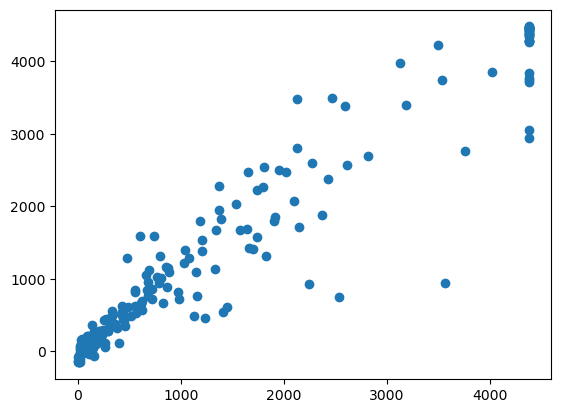

In [88]:
plt.scatter(y_test, y_pred_test)
plt.show()

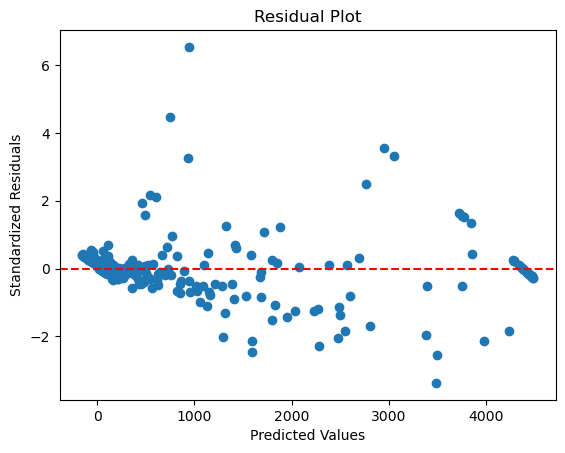

In [97]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Calculate the standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Create the residual plot
plt.scatter(y_pred_test, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

### Linear Regression on Scaled Data after dropping variables as per VIF

In [77]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [78]:
# Drop features with VIF scores greater than 10
to_drop = vif[vif["VIF"] > 5]["feature"].values
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [79]:


# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both the training set and the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute the RMSE and R-squared for both the training set and the test set
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the model coefficients, model_intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('----\n')
# Print the performance metrics for both the training set and the test set
print("Training set performance:")
print(f"RMSE: {rmse_train:.3f}")
print(f"R-squared: {r2_train:.3f}")
print('MSE', mse_train)

print("\nTest set performance:")
print(f"RMSE: {rmse_test:.3f}")
print(f"R-squared: {r2_test:.3f}")
print('MSE', mse_test)


Coefficients: [[  21.6288429   429.0632531  2050.9331315  -246.32957      54.98948947]]
Intercept: [669.99885843]
----

Training set performance:
RMSE: 854.696
R-squared: 0.699
MSE 730504.8254082266

Test set performance:
RMSE: 948.881
R-squared: 0.573
MSE 900375.8143274568


In [80]:
df['sales'].describe()

count     759.000000
mean     1236.090089
std      1528.690552
min         0.138000
25%       122.920000
50%       448.577082
75%      1822.547366
max      4371.988416
Name: sales, dtype: float64

## Best Model

Based on all performance matrices, there is no edge for any model. stats ols and Scikit learn regrssion model both are best models.

1.	Scikit learn gives Test set performance of RMSE: 400.002, R-squared: 0.924

2.	Stats model gives test set performance of RMSE: 394.38620894692014, R-squared: 0.9261493138182268

3.	Stats model is slightly a better model compared to scikitlearn.

## 1.4 Inference

Based on these predictions, what are the business insights and recommendations. (6 marks)

1.	There might still be multicollinearity which needs to be addressed with business team.

2.	Stats model is used for model prediction given equation y = (81.7013 * const) + (0.4118 * capital) + (80.6845 * employment) + (176.4655 * sp500) - (39.6549 * tobinq) + (0.2466 * value)

3.	‘capital’, ‘employment’, ‘tobinq’, ‘value’, ‘sp500’ are the best predictors of the target variable.

4.	‘institutions’, ‘patents’, ‘raandd’ do not show a significance value in predicting the target variable. However, this does not mean they are poor predictors.

5.	Focus on Capital Investment - as this variable has a high positive impact on ‘sales’

6.	Monitor S&P 500 Performance: The coefficient of the "sp500" variable is 176.4655. This indicates that the performance of the S&P 500 index has a positive impact on the response variable. It is recommended to closely monitor the trends and movements of the S&P 500 index as it can potentially influence the ‘sales’ outcome.

7.	‘tobinq’ has an inverse relationship and the company should evaluate this variable carefully as this has a negative effect on the ‘sales’.


--End--